In [2]:
#librerias 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import re 
import pandas as pd 
import seaborn as sns 

# Datasets

In [3]:
#cargamos los datos 

path_data="/home/arturo/Documents/MasterCD/TFM/data_paper_AnomalyDiscrepancy"

dataset_name="PSM"

try:
    train_data=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}_train.npy"))
    test_data=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}_test.npy"))
    test_label=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}_test_label.npy"))
except: 
    try:
        train_data=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}/{dataset_name}_train.npy"))
        test_data=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}/{dataset_name}_test.npy"))
        test_label=np.load(os.path.join(path_data,dataset_name,f"{dataset_name}/{dataset_name}_test_label.npy"))
    except:
        train_data=pd.read_csv(os.path.join(path_data,dataset_name,f"{dataset_name}/train.csv"))
        test_data=pd.read_csv(os.path.join(path_data,dataset_name,f"{dataset_name}/test.csv"))
        test_label=pd.read_csv(os.path.join(path_data,dataset_name,f"{dataset_name}/test_label.csv"))


In [4]:
print(train_data.shape,test_data.shape,test_label.shape)

(132481, 26) (87841, 26) (87841, 2)


<AxesSubplot: xlabel='timestamp_(min)'>

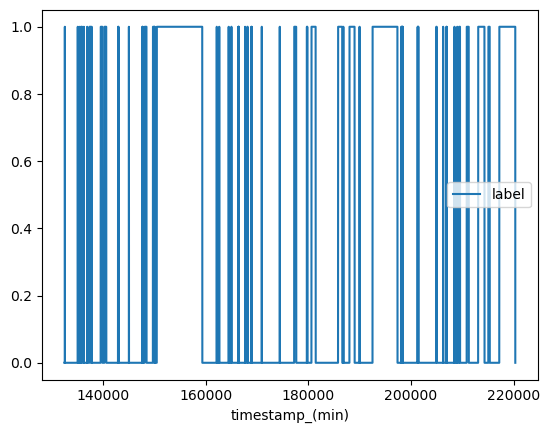

In [44]:
test_label.plot(x="timestamp_(min)",y="label")

In [5]:
df_test=test_data.merge(test_label,on="timestamp_(min)")
df_test

,timestamp_(min),feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,label
0,132480.0,0.775374,0.909185,0.606704,0.660626,0.449968,0.426717,0.471591,0.434668,0.479511,...,0.480444,0.588670,0.404036,0.638957,0.020236,0.042705,0.173375,0.008715,0.105991,0
1,132481.0,0.775423,0.909142,0.607796,0.660655,0.487813,0.442545,0.505682,0.448640,0.499451,...,0.500213,0.587041,0.421605,0.637865,0.018550,0.042705,0.191826,0.010893,0.110599,0
2,132482.0,0.775458,0.909004,0.607988,0.660623,0.469532,0.433682,0.477273,0.450906,0.487223,...,0.487982,0.582404,0.407393,0.636091,0.018550,0.039146,0.188361,0.010893,0.115207,0
3,132483.0,0.775513,0.909200,0.607218,0.660640,0.459910,0.435581,0.482955,0.454683,0.490431,...,0.491253,0.584660,0.407141,0.638138,0.020236,0.042705,0.186975,0.013072,0.110599,0
4,132484.0,0.775587,0.909318,0.606654,0.660643,0.462155,0.436214,0.477273,0.449396,0.494671,...,0.495947,0.581527,0.402761,0.632678,0.021922,0.042705,0.156325,0.008715,0.110599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87836,220316.0,0.864548,0.660041,0.590923,0.413322,0.364657,0.380184,0.494318,0.450529,0.382934,...,0.386574,0.755608,0.355207,0.835244,0.000000,0.028470,0.164872,0.021786,0.069124,0
87837,220317.0,0.864483,0.536428,0.590742,0.413331,0.363695,0.378601,0.500000,0.451662,0.377564,...,0.381169,0.562101,0.349141,0.490718,0.000000,0.010676,0.157812,0.015251,0.069124,0
87838,220318.0,0.864644,0.636236,0.590451,0.413619,0.348942,0.377018,0.488636,0.438822,0.373536,...,0.377329,0.640556,0.342261,0.700519,0.000000,0.028470,0.163298,0.015251,0.129032,0
87839,220319.0,0.864553,0.643499,0.590222,0.413689,0.355997,0.379550,0.522727,0.448640,0.374963,...,0.378751,0.759744,0.343052,0.828556,0.000000,0.032028,0.150160,0.017429,0.059908,0


In [22]:
df_train=pd.DataFrame(train_data)
df_test=pd.DataFrame(test_data)
df_test["labels"]=np.array(test_label,dtype=int)


In [23]:
df_test


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,labels
0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427612,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
427613,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
427614,0.992570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
427615,0.995638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [8]:
df_test.isna().sum().sum()

0

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

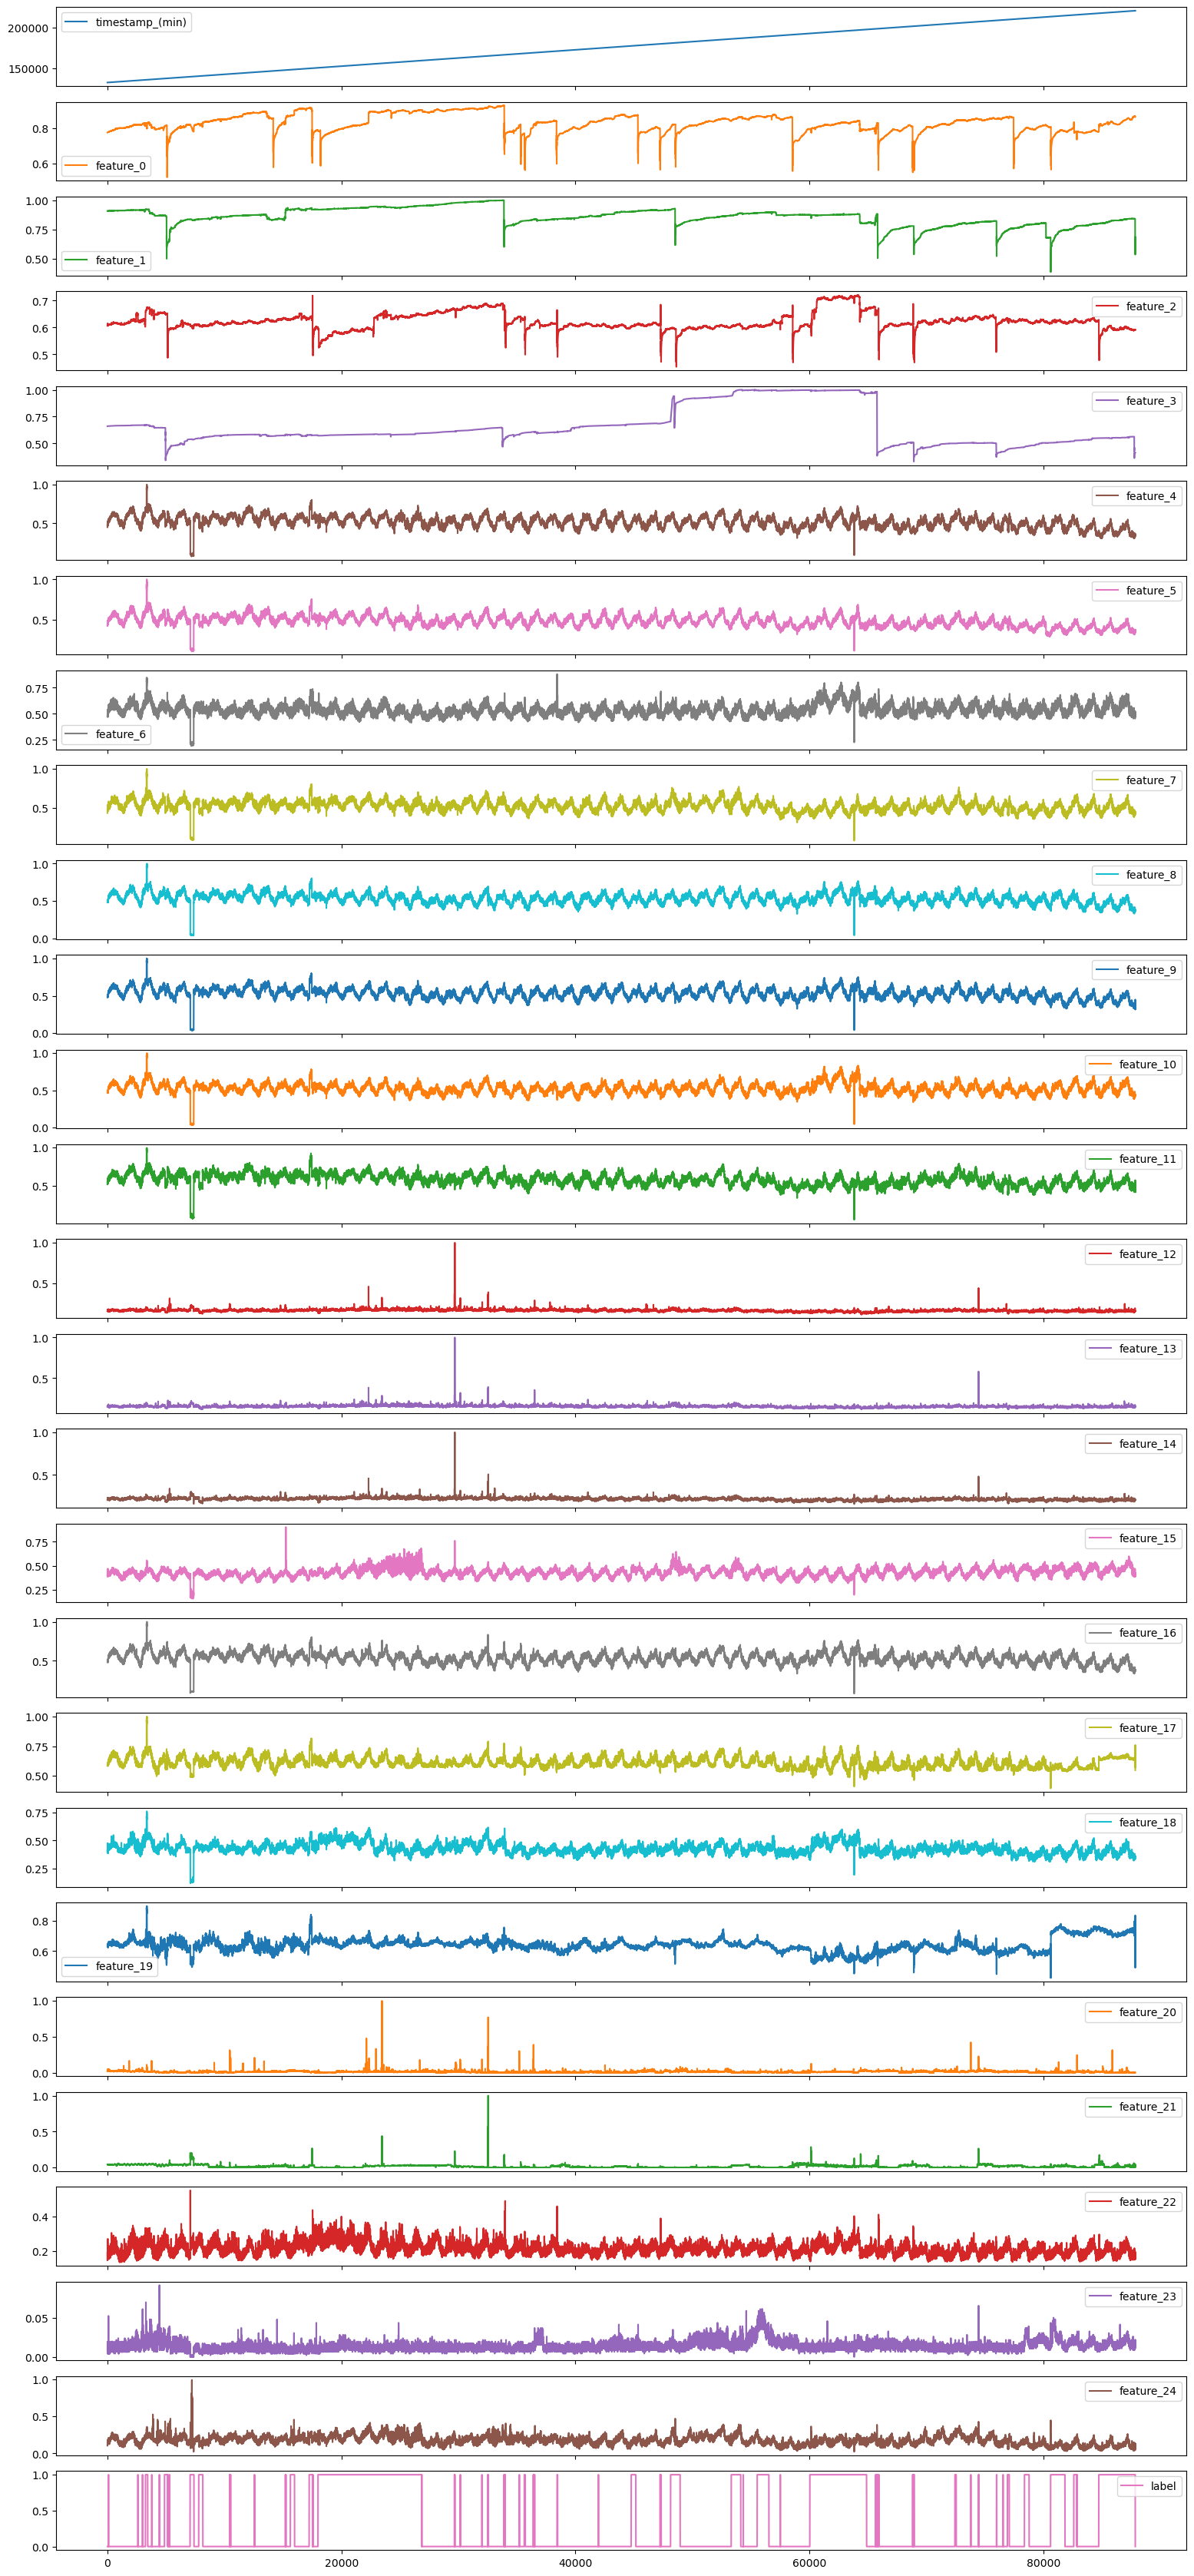

In [7]:
df_test.plot(subplots=True,figsize=(19,43),sharex=True)

<AxesSubplot: >

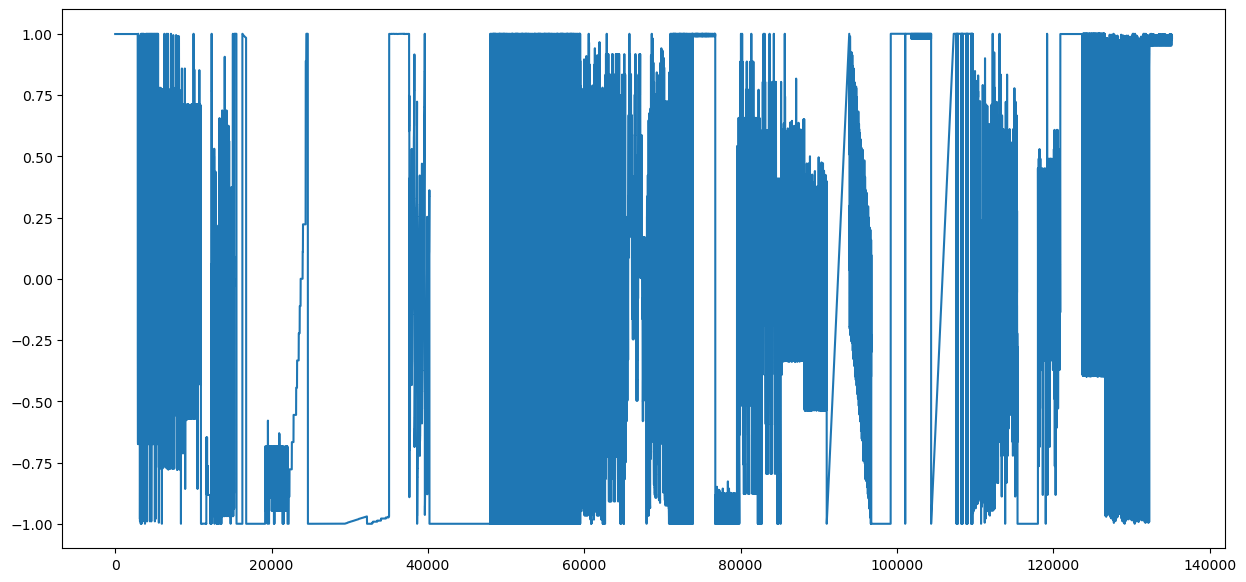

In [11]:
df_train.iloc[:,0].plot(figsize=(15,7))

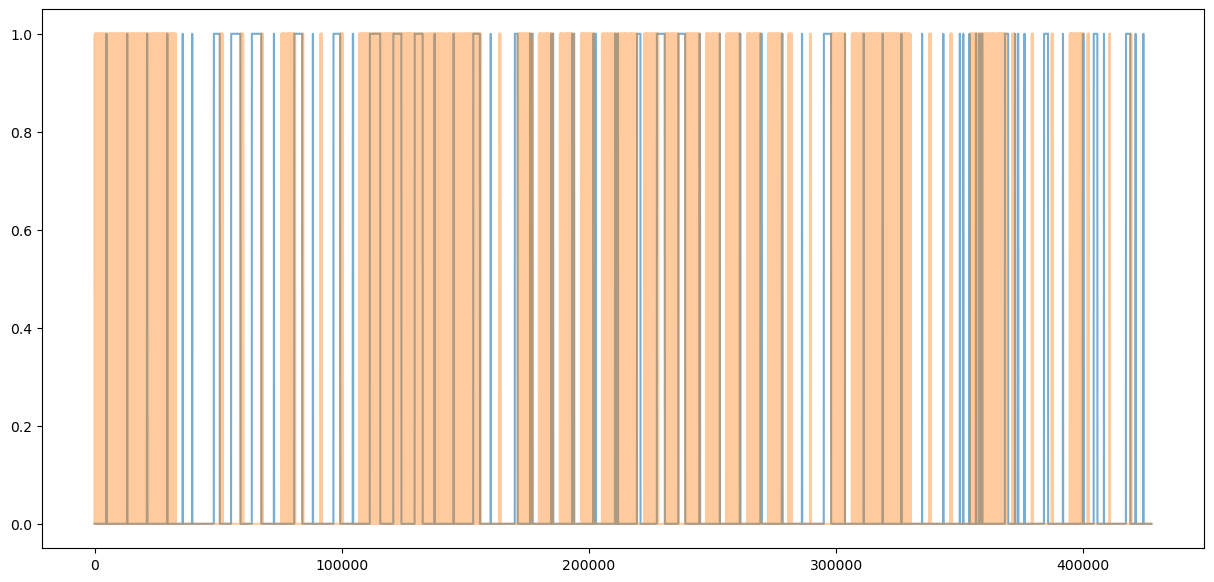

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
alpha=[0.6,0.4]
for i, col in enumerate(df_test.columns[[-1,6]]):
    df_test[col].plot(ax=ax, alpha=alpha[i])